## Importing packages

Throughout this tutorial, we will use the following common Python packages:

In [1]:
# Use these packages to easily access files on your hard drive
import os, sys, glob
# The Numpy package allows you to manipulate data (mainly numerical)
import numpy as np
# The Pandas package allows more advanced data manipulation e.g. in structured data frames
import pandas as pd
# The Matplotlib package is for plotting - uses the same syntax as plotting in Matlab (figures, axes etc)
import matplotlib.pyplot as plt
# Seaborn is a higher-level package for plotting that calls functions in Matplotlib,
# you can usually input your Pandas dataframes to get pretty plots in 1 or 2 lines
import seaborn as sns
# We will use Scipy for advanced computation like model fitting
import scipy

## Problems

1. generate some random data in two variables of equal length and make a scatter plot using matplotlib
2. generate some data for a linear relationship between two variables (e.g. age and height of schoolchildren), put them in a Pandas dataframe with 2 named columns, and use Seaborn to create a scatterplot with regression line
3. create a Pandas dataframe with height data for 5 age groups and use Seaborn to turn this into a barplot with errorbars and an overlaid stripplot or swarmplot.

## Solutions

#### 1. Generate some random data in two variables of equal length and make a scatter plot using matplotlib

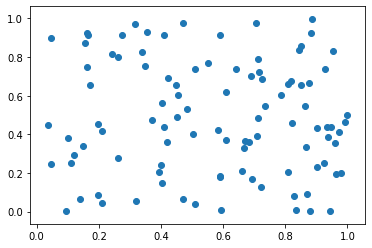

In [11]:
var1 = np.random.rand(100)
var2 = np.random.rand(100)
plt.scatter(var1,var2)

#### 2. Generate some data for a linear relationship between two variables (e.g. age and height of schoolchildren), put them in a Pandas dataframe with 2 named columns, and use Seaborn to create a scatterplot with regression line

In [16]:
age = 5 + np.random.rand(100)*7
height = 108 + (152-108)*((age-5)/7) + np.random.randn(100)*20
age_height = pd.DataFrame.from_dict({'age':age,'height':height}).sort_values(by=['age','height'])
display(age_height.head())

,age,height
15,5.076242,69.992804
39,5.098260,77.906485
65,5.217319,122.194395
70,5.247141,116.673055
49,5.340868,110.282921


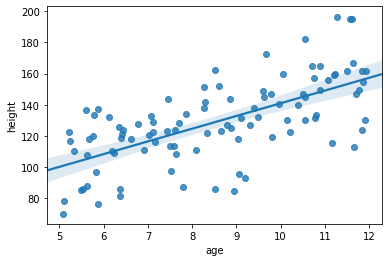

In [19]:
sns.regplot(data = age_height, x = 'age', y = 'height')

#### 3. Create a Pandas dataframe with height data for 5 age groups and use Seaborn to turn this into a barplot with errorbars and an overlaid stripplot or swarmplot.

In [21]:
age_height['group'] = age_height['age'].apply(lambda x: np.floor(x)-4)
age_height

,age,height,group
15,5.076242,69.992804,1.0
39,5.098260,77.906485,1.0
65,5.217319,122.194395,1.0
70,5.247141,116.673055,1.0
49,5.340868,110.282921,1.0
...,...,...,...
21,11.829630,161.337580,7.0
51,11.840346,123.459229,7.0
19,11.853831,154.851284,7.0
95,11.909960,130.388939,7.0


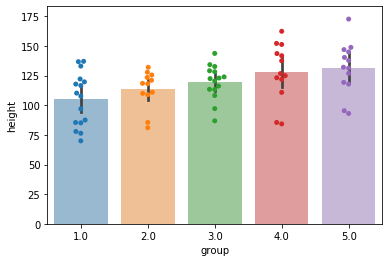

In [24]:
sns.barplot(data = age_height.query('group < 6'), x = 'group', y = 'height', alpha = .5)
sns.swarmplot(data = age_height.query('group < 6'), x = 'group', y = 'height')